In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
!pip install wolta==0.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('/content/LoanDataset - LoansDatasest.csv')
df.sample()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
7088,7087.0,25,60000,RENT,9.0,MEDICAL,A,"£7,000.00",10.36,5,NaN,4,NO DEFAULT


In [5]:
del df['customer_id']

In [6]:
df.sample()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
18570,30,24000,OWN,0.0,VENTURE,A,"£2,500.00",7.29,3,NaN,6,NO DEFAULT


In [10]:
from wolta.data_tools import col_types
types = col_types(df, print_columns=True)

customer_age: int64
customer_income: str
home_ownership: str
employment_duration: float64
loan_intent: str
loan_grade: str
loan_amnt: str
loan_int_rate: float64
term_years: int64
historical_default: str
cred_hist_length: int64
Current_loan_status: str


In [11]:
from wolta.data_tools import seek_null

In [14]:
null_count = seek_null(df, print_columns=True)


employment_duration has 895 null values
loan_amnt has 1 null values
loan_int_rate has 3116 null values
historical_default has 20737 null values
Current_loan_status has 4 null values


In [15]:
from wolta.data_tools import unique_amounts
unique_amounts(df)

{'customer_age': 62,
 'customer_income': 4299,
 'home_ownership': 4,
 'employment_duration': 37,
 'loan_intent': 6,
 'loan_grade': 5,
 'loan_amnt': 756,
 'loan_int_rate': 349,
 'term_years': 10,
 'historical_default': 3,
 'cred_hist_length': 29,
 'Current_loan_status': 3}

In [16]:
del df['historical_default']

In [20]:
df['employment_duration'] = df['employment_duration'].fillna(np.nanmean(df['employment_duration'].values))
df['loan_int_rate'] = df['loan_int_rate'].fillna(np.nanmean(df['loan_int_rate'].values))
df['Current_loan_status'] = df['Current_loan_status'].fillna('unknown')

In [21]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,loan
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,3,DEFAULT,123
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,2,NO DEFAULT,5
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,3,DEFAULT,1
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,2,DEFAULT,4
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,4,DEFAULT,8


In [22]:
from wolta.data_tools import extract_float
df['loan_amnt'] = extract_float(df['loan_amnt'], ['£', ','])

In [24]:
df['loan_amnt'] = df['loan_amnt'].replace({'n': 0., 'a': 0.})

0    35000.0
Name: loan_amnt, dtype: float64

In [26]:
df['loan_amnt'] = df['loan_amnt'].fillna(np.nanmean(df['loan_amnt'].values))

In [27]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [28]:
seeked

[]

In [29]:
df['customer_income'] = extract_float(df['customer_income'], [','])

In [30]:
df['customer_income'][:1]

0    59000.0
Name: customer_income, dtype: object

In [31]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,loan
0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,3,DEFAULT,123
1,21,9600.0,OWN,5.0,EDUCATION,A,1000.0,11.14,1,2,NO DEFAULT,5
2,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,3,DEFAULT,1
3,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,2,DEFAULT,4
4,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,4,DEFAULT,8


In [32]:
from wolta.data_tools import make_numerics

In [35]:
# cols = ['home_ownership', 'loan_intent', 'loan_grade', 'Current_loan_status']
df['home_ownership'] = make_numerics(df['home_ownership'])
df['loan_intent'] = make_numerics(df['loan_intent'])
df['loan_grade'] = make_numerics(df['loan_grade'])
df['Current_loan_status'] = make_numerics(df['Current_loan_status'])

In [36]:
df.head(3)

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,loan
0,22,59000.0,0,123.0,0,0,35000.0,16.02,10,3,0,123
1,21,9600.0,1,5.0,1,1,1000.0,11.14,1,2,1,5
2,25,9600.0,2,1.0,2,2,5500.0,12.87,5,3,0,1


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,32586.0,27.732769,6.360528,3.00,23.00,26.000000,30.00,144.00
home_ownership,32586.0,0.914288,0.960851,0.00,0.00,0.000000,2.00,3.00
employment_duration,32586.0,4.790161,4.085456,0.00,2.00,4.000000,7.00,123.00
loan_intent,32586.0,2.339686,1.678877,0.00,1.00,2.000000,4.00,5.00
loan_grade,32586.0,1.316455,0.858015,0.00,1.00,1.000000,2.00,4.00
loan_amnt,32586.0,9756.246739,21771.517418,500.00,5000.00,8000.000000,12200.00,3500000.00
loan_int_rate,32586.0,11.011553,3.081611,5.42,8.49,11.011553,13.11,23.22
term_years,32586.0,4.761738,2.471107,1.00,3.00,4.000000,7.00,10.00
cred_hist_length,32586.0,5.804026,4.055078,2.00,3.00,4.000000,8.00,30.00
Current_loan_status,32586.0,0.790217,0.407462,0.00,1.00,1.000000,1.00,2.00


In [41]:
from wolta.data_tools import stat_sum
stat_sum(df, ['max', 'min', 'width', 'var', 'med'])

customer_age
max: 144
min: 3
width: 141
variance: 40.45507118425894
median: 26.0
***
customer_income
max: 6000000.0
min: 4000.0
width: 5996000.0
variance: 3841438425.7502003
median: 55000.0
***
home_ownership
max: 3
min: 0
width: 3
variance: 0.9232065103637547
median: 0.0
***
employment_duration
max: 123.0
min: 0.0
width: 123.0
variance: 16.690436760450513
median: 4.0
***
loan_intent
max: 5
min: 0
width: 5
variance: 2.8185422691378905
median: 2.0
***
loan_grade
max: 4
min: 0
width: 4
variance: 0.7361663558668273
median: 1.0
***
loan_amnt
max: 3500000.0
min: 500.0
width: 3499500.0
variance: 473984424.5911192
median: 8000.0
***
loan_int_rate
max: 23.22
min: 5.42
width: 17.799999999999997
variance: 9.496036596865205
median: 11.01155276552426
***
term_years
max: 10
min: 1
width: 9
variance: 6.10618471583086
median: 4.0
***
cred_hist_length
max: 30
min: 2
width: 28
variance: 16.44315079339329
median: 4.0
***
Current_loan_status
max: 2
min: 0
width: 2
variance: 0.1660197959368542
median: 1.0

In [42]:
df.corr()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,loan
customer_age,1.000000,0.173059,0.030835,0.160644,0.025555,0.092103,0.014378,0.012034,0.136092,0.857460,0.028990,0.160938
customer_income,0.173059,1.000000,0.199271,0.133358,0.016131,0.005714,0.080237,0.000729,0.059489,0.117947,0.140529,0.135163
home_ownership,0.030835,0.199271,1.000000,0.228241,0.017726,-0.054614,0.030142,-0.132251,0.009365,0.025194,0.226150,0.227770
employment_duration,0.160644,0.133358,0.228241,1.000000,0.016186,0.004690,0.033514,-0.052959,0.074707,0.143024,0.084195,0.999501
loan_intent,0.025555,0.016131,0.017726,0.016186,1.000000,0.001047,-0.002014,0.005912,0.034947,0.017131,-0.086489,0.016086
loan_grade,0.092103,0.005714,-0.054614,0.004690,0.001047,1.000000,0.022752,0.259308,0.045651,0.099687,-0.137616,0.004958
loan_amnt,0.014378,0.080237,0.030142,0.033514,-0.002014,0.022752,1.000000,0.036910,0.077508,0.009802,-0.029806,0.034159
loan_int_rate,0.012034,0.000729,-0.132251,-0.052959,0.005912,0.259308,0.036910,1.000000,0.041656,0.015704,-0.321737,-0.051380
term_years,0.136092,0.059489,0.009365,0.074707,0.034947,0.045651,0.077508,0.041656,1.000000,0.182438,-0.033398,0.075351
cred_hist_length,0.857460,0.117947,0.025194,0.143024,0.017131,0.099687,0.009802,0.015704,0.182438,1.000000,0.020028,0.143189


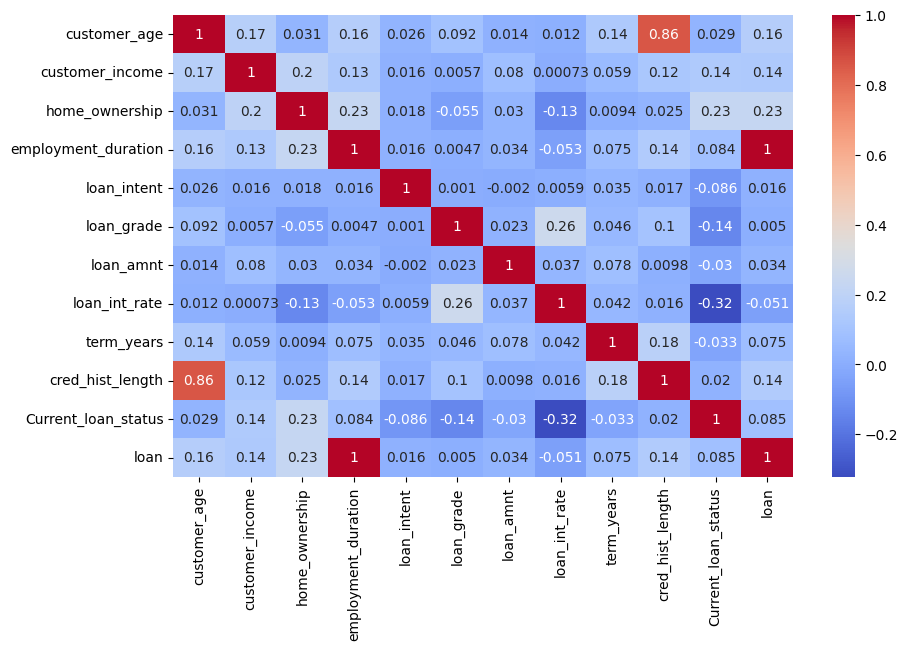

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [48]:
y = df['Current_loan_status'].values
del df['Current_loan_status']
X = df.values
del df

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
del X,y

In [51]:
from wolta.model_tools import compare_models
compare_models('clf', ['ada', 'cat', 'raf', 'dtr', 'log'],['acc', 'precision'], X_train, y_train, X_test, y_test)

AdaBoost
Accuracy Score: 0.7895059834305002
Precision Score: 0.7430487237830016
***
CatBoost
Accuracy Score: 0.9285056765879104
Precision Score: 0.928410356233633
***
Random Forest
Accuracy Score: 0.9234427738570113
Precision Score: 0.9234569986958018
***
Decision Tree
Accuracy Score: 0.8830929733046947
Precision Score: 0.8825990486891347
***
Logistic Regression
Accuracy Score: 0.8166615526235042
Precision Score: 0.7964477170310895
***
